# Importing Libraries

In [ ]:
import numpy as Nump
import pandas as pan
import matplotlib.pyplot as PLT
import seaborn as visuali
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Importing Dataset

In [ ]:
Data_set=pan.read_csv("Housing.csv")
Data_set.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Describing Dataset

In [ ]:
Data_set.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Checking for missing values

In [ ]:
Data_set.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Seperating numerical and categorical data



In [ ]:
numeric_Data_set = Data_set.select_dtypes(include=[Nump.number])
categorical_Data_set = Data_set.select_dtypes(exclude=[Nump.number])
print(numeric_Data_set)
print(categorical_Data_set)

        price  area  bedrooms  bathrooms  stories  parking
0    13300000  7420         4          2        3        2
1    12250000  8960         4          4        4        3
2    12250000  9960         3          2        2        2
3    12215000  7500         4          2        2        3
4    11410000  7420         4          1        2        2
..        ...   ...       ...        ...      ...      ...
540   1820000  3000         2          1        1        2
541   1767150  2400         3          1        1        0
542   1750000  3620         2          1        1        0
543   1750000  2910         3          1        1        0
544   1750000  3850         3          1        2        0

[545 rows x 6 columns]
    mainroad guestroom basement hotwaterheating airconditioning prefarea  \
0        yes        no       no              no             yes      yes   
1        yes        no       no              no             yes       no   
2        yes        no      yes         

# Encoding categorical data using LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_col=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]
label_encoder=LabelEncoder()
Data_set[cat_col]=Data_set[cat_col].apply(label_encoder.fit_transform)

# Visualizing histogram for numerical columns

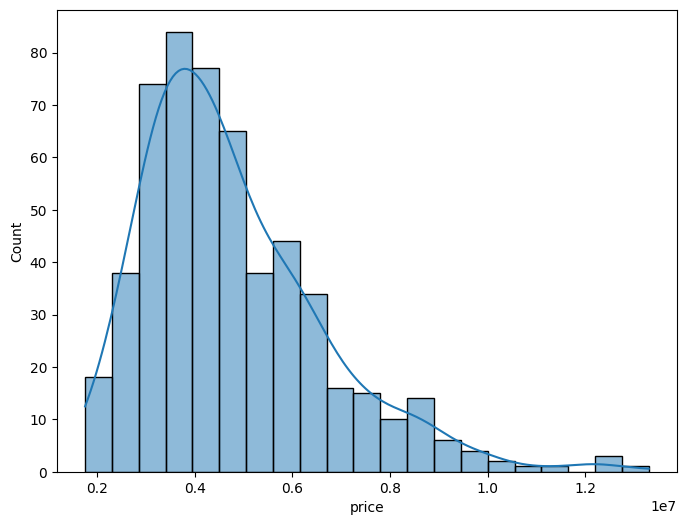

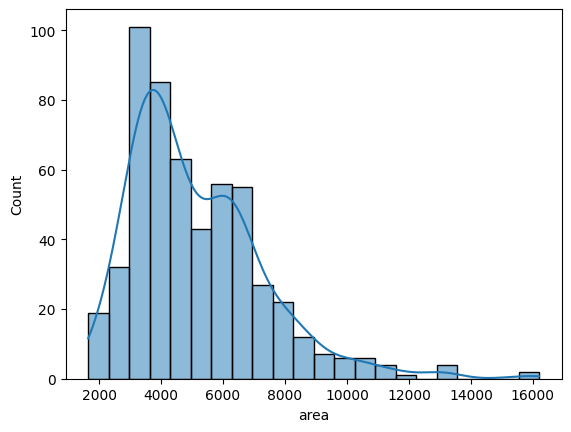

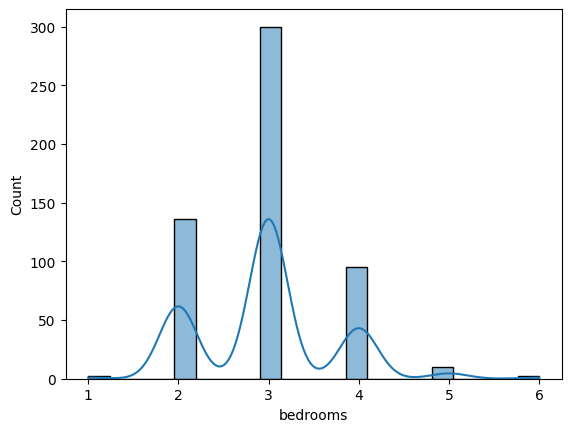

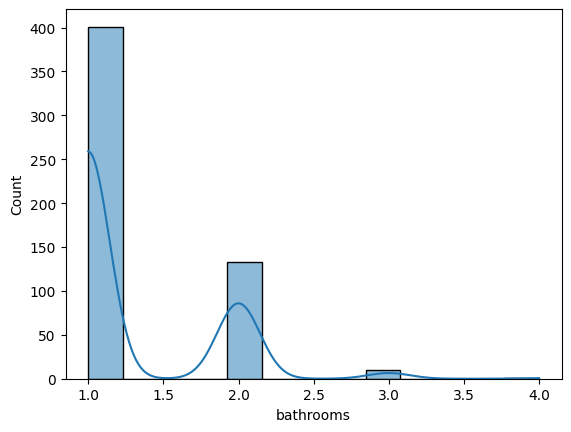

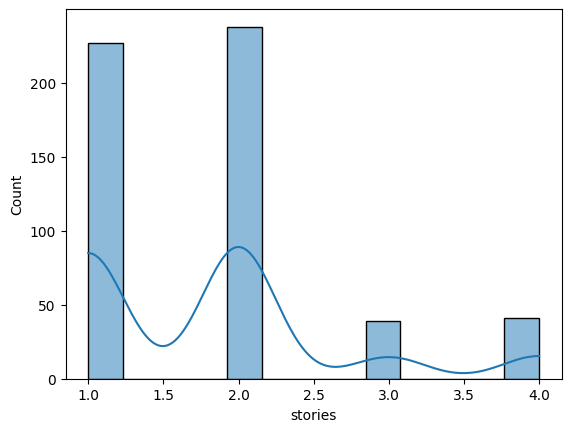

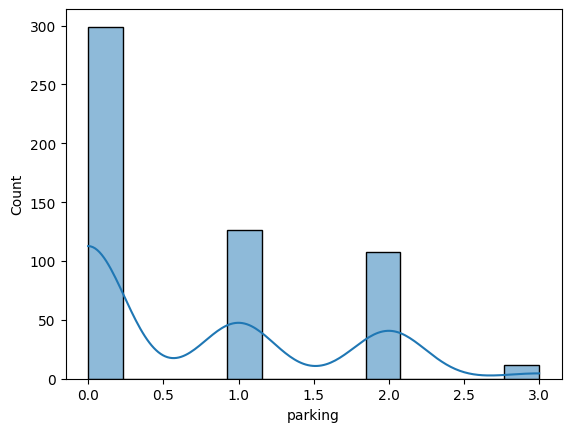

In [ ]:
PLT.figure(figsize=(8,6))
for column in numeric_Data_set:
    visuali.histplot(data=Data_set,x=column,kde=True)
    PLT.show()

# Dependent and Independent Variables

In [ ]:
x=Data_set.iloc[:,:-1].values
y=Data_set.iloc[:,-1].values


# Train test and split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


# Linear Regression Model

In [ ]:
LIR=LinearRegression()
LIR.fit(x_train,y_train)

LinearRegression()

# Evaluating model

In [ ]:
print("INTERCEPT:-",LIR.intercept_)
print(LIR.coef_)

INTERCEPT:- 1.7294103226990085
[-1.08125211e-07  1.68538133e-05  8.91783889e-03  6.19183519e-02
 -5.21609903e-02 -1.73317308e-01 -2.33739906e-02 -1.51854159e-01
 -3.88782284e-02 -2.12646366e-02 -7.63198651e-02  3.61240630e-02]


# Predicting test result

In [ ]:
Pred=LIR.predict(x_test)
print(Pred)

[1.21687152 0.95557682 1.25063093 0.90712097 1.3565944  1.17604798
 0.99463666 1.0650627  1.44700909 1.44888266 0.47822999 1.36237589
 1.4351342  1.25085216 1.20951353 1.58778921 1.27761963 0.74926098
 1.09297557 1.37448958 0.80898507 0.96068318 1.44082897 0.82140608
 0.89746509 0.17732158 1.12751054 0.92517472 0.41365171 1.30961097
 0.79861159 1.1382687  0.88765186 1.33404276 1.27032137 1.12817841
 0.76106431 1.07410513 1.4248696  1.40091267 0.98030956 1.22624061
 0.95422852 1.00433864 1.35685488 1.1008853  0.86643363 0.93060386
 1.39465924 1.13296572 0.54186539 1.29302086 1.17662567 1.18317179
 1.10917753 1.62574668 0.4504872  1.35382911 1.18880442 1.31848928
 0.97842358 1.43322322 0.92808125 1.16113652 1.02229397 0.70840016
 0.76180947 0.88663036 0.86568149 0.65662952 1.31440607 1.02609505
 1.24022492 0.90292442 1.18317401 0.92516546 0.94187528 1.15745182
 0.85440332 1.62866224 0.76786719 1.00622523 0.78563872 0.78107163
 1.36473774 0.62763484 1.35218151 1.06889968 0.10832779 0.3608

# Visualizing the distribution of difference between actual and predicted values

<ipython-input-15-d058d560024d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  visuali.distplot((y_test-Pred),bins=50)


<Axes: ylabel='Density'>

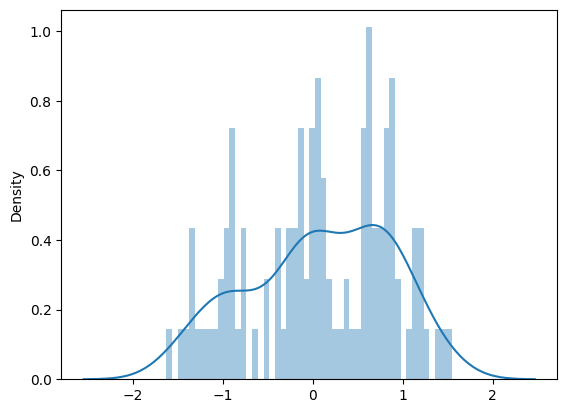

In [ ]:
visuali.distplot((y_test-Pred),bins=50)

# Evaluation Metrics

In [ ]:
mse=mean_squared_error(y_test,Pred)
rmse=Nump.sqrt(mse)
r2=r2_score(y_test,Pred)
mae=mean_absolute_error(y_test,Pred)
print("The R_squared score:",r2)
print("The Root mean squared error:",rmse)
print("The Mean absolute error:",mae)

The R_squared score: 0.02848331981607577
The Root mean squared error: 0.7823904562382503
The Mean absolute error: 0.6528965180210892


# Determining correlation

<Axes: >

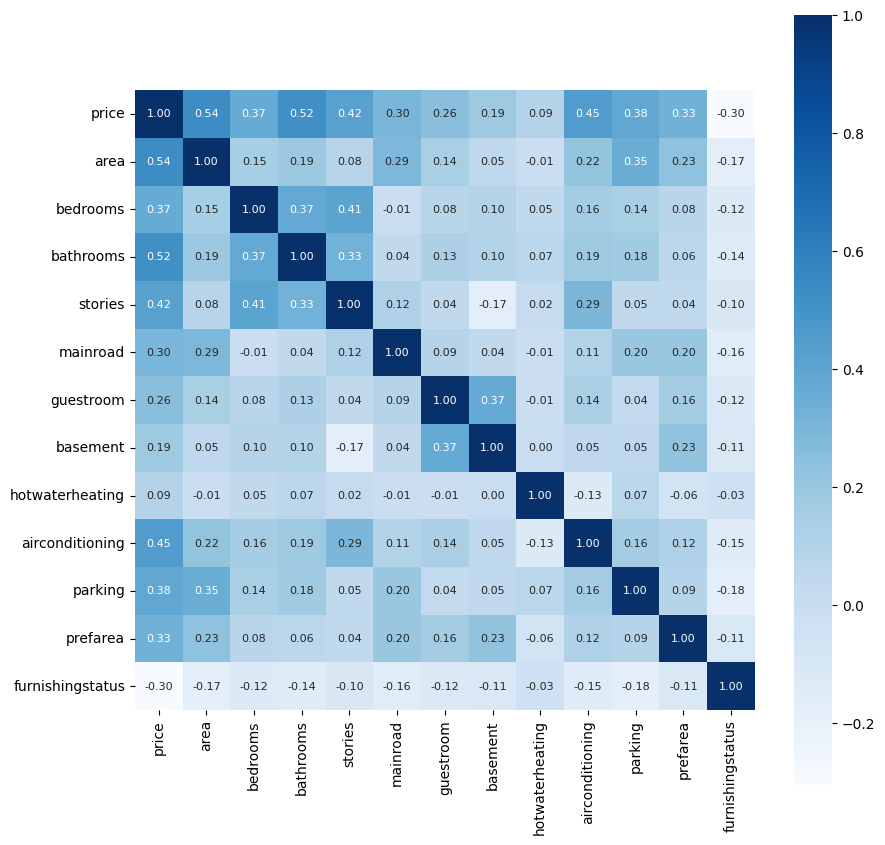

In [ ]:
correlation=Data_set.corr()
PLT.figure(figsize=(10,10))
visuali.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')